In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


/Users/maritzaahumada/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


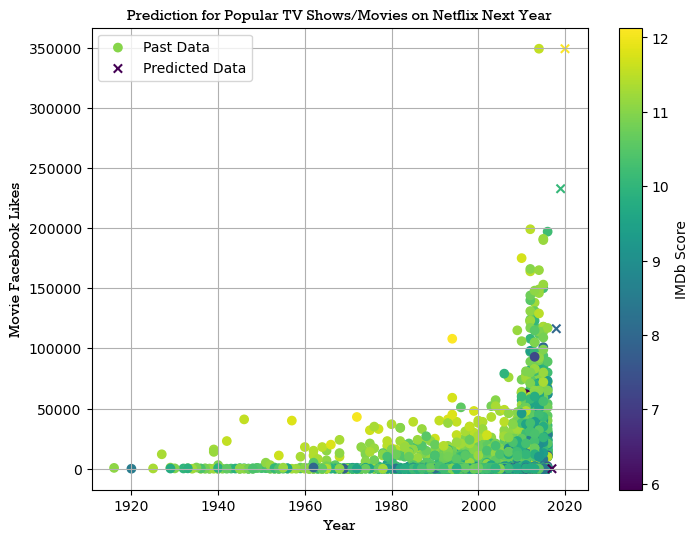

In [36]:
#Load Data
#Loading data from a csv file
file_path = '/Users/maritzaahumada/Downloads/cleaned_data.csv'
df = pd.read_csv(file_path)
df.head()

# Data Cleaning
# Convert relevant columns to appropriate data types
df['title_year'] = pd.to_numeric(df['title_year'], errors='coerce')
df['imdb_score'] = pd.to_numeric(df['imdb_score'], errors='coerce')
df['movie_facebook_likes'] = pd.to_numeric(df['movie_facebook_likes'], errors='coerce')

# Drop rows with missing values in relevant columns
df.dropna(subset=['title_year', 'imdb_score', 'movie_facebook_likes'], inplace=True)

# Feature selection
X = df[['title_year', 'movie_facebook_likes']]
y = df['imdb_score']

# Linear regression model
model = LinearRegression()
model.fit(X, y)

# Predicting IMDb scores for future years
future_years = np.arange(df['title_year'].max() + 1, df['title_year'].max() + 5)  # Next 5 years
future_likes = np.linspace(df['movie_facebook_likes'].min(), df['movie_facebook_likes'].max(), num=len(future_years)).reshape(-1, 1)
future_X = np.column_stack((future_years, future_likes))

# Predicting IMDb scores
future_pred = model.predict(future_X)

# Visualization 1: Predicting popular TV shows/movies on Netflix next year
plt.figure(figsize=(8, 6))
plt.scatter(df['title_year'], df['movie_facebook_likes'], c=df['imdb_score'], cmap='viridis', label='Past Data')
plt.scatter(future_years, future_likes, c=future_pred, cmap='viridis', marker='x', label='Predicted Data')
plt.colorbar(label='IMDb Score')
plt.xlabel('Year',font = 'RockWell')
plt.ylabel('Movie Facebook Likes',font = 'RockWell')
plt.title('Prediction for Popular TV Shows/Movies on Netflix Next Year',font = 'RockWell')
plt.legend()
plt.grid(True)
plt.show()

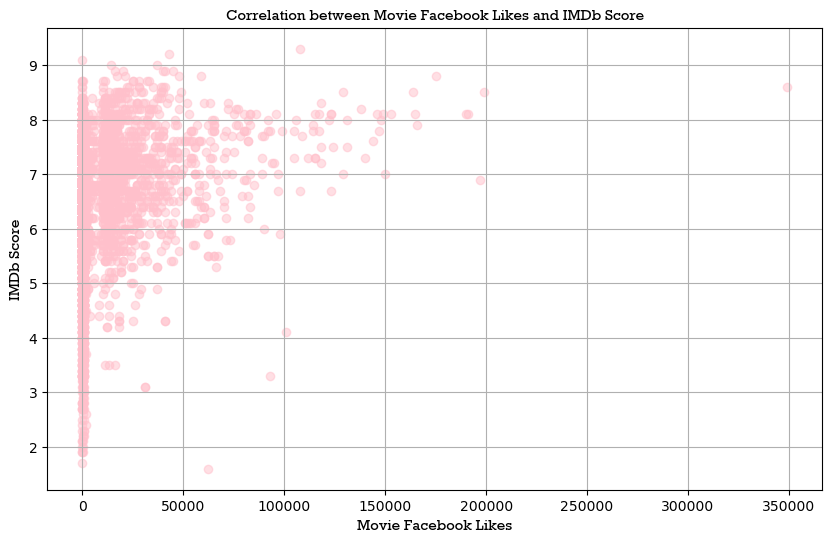

In [22]:
# Visualization 2: Correlation between movie Facebook likes and IMDb score
plt.figure(figsize=(10, 6))
plt.scatter(df['movie_facebook_likes'], df['imdb_score'], alpha=0.5, color = 'pink')
plt.title('Correlation between Movie Facebook Likes and IMDb Score', font = 'RockWell')
plt.xlabel('Movie Facebook Likes', font = 'RockWell')
plt.ylabel('IMDb Score', font = 'RockWell')
plt.grid(True)
plt.show()

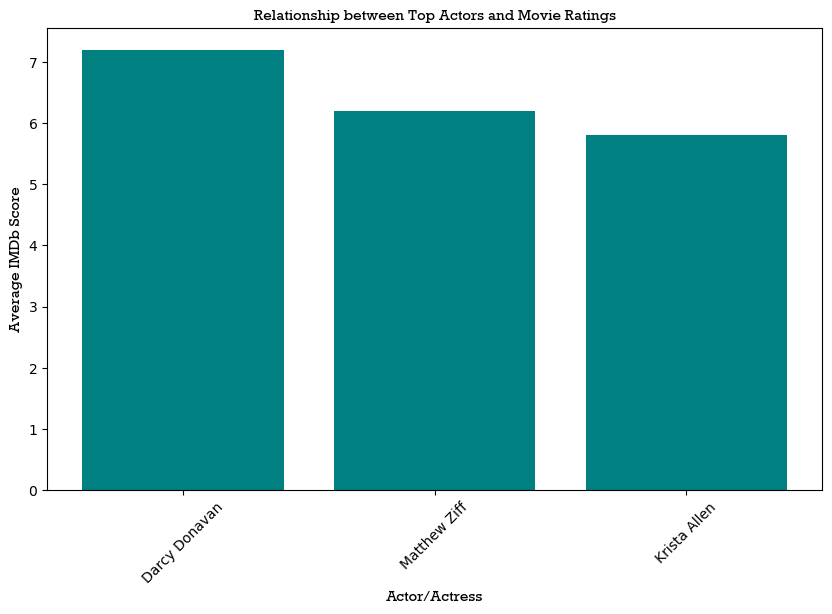

In [30]:
# Visualization 3: Relationship between actors/actresses and movie ratings
# For simplicity, let's visualize the top 5 actors with the highest Facebook likes
top_actors = df.nlargest(5, 'actor_1_facebook_likes')['actor_1_name']
avg_imdb_scores = []
for actor in top_actors:
    avg_imdb_scores.append(df[df['actor_1_name'] == actor]['imdb_score'].mean())

plt.figure(figsize=(10, 6))
plt.bar(top_actors, avg_imdb_scores, color = 'teal')
plt.title('Relationship between Top Actors and Movie Ratings', font = 'RockWell')
plt.xlabel('Actor/Actress', font = 'RockWell')
plt.ylabel('Average IMDb Score',font = 'RockWell')
plt.xticks(rotation=45)
plt.show()

In [15]:
# columns_to_remove = ['language', 'country', 'budget', 'content_rating', 'aspect_ratio', 'duration', 'gross', 'plot_keywords', 'color']

# df_cleaned = df.drop(columns=columns_to_remove)


In [16]:
# df_cleaned.head()

In [17]:
# df_cleaned.to_csv('cleaned_data.csv', index=False)